# copy code from caffe example

In [2]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

- load caffe

In [3]:
# The caffe module needs to be on the Python path;
#  we'll add it here explicitly.
import sys
caffe_root = '../'  # this file should be run from {caffe_root}/examples (otherwise change this line)
sys.path.insert(0, caffe_root + 'python')

import caffe
# If you get "No module named _caffe", either you have not built pycaffe or you have the wrong path.

- load model

In [4]:
import os
if os.path.isfile(caffe_root + 'examples/mnist/lenet_iter_10000.caffemodel'):
    print 'CaffeNet found.'
else:
    print 'CaffeNet not found.'

CaffeNet found.


- Set Caffe to CPU mode and load the net from disk.

In [5]:
import os
if os.path.isfile(caffe_root + 'examples/trc.prototxt'):
    print 'prototxt found.'
else:
    print 'prototxt not found.'

prototxt found.


In [6]:
caffe.set_mode_cpu()

model_def = caffe_root + 'examples/trc.prototxt'

model_weights = caffe_root + 'examples/mnist/lenet_iter_10000.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
     caffe.TEST)     # use test mode (e.g., don't perform dropout)

In [7]:
# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

#transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
#transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
#transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
#transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

### 3. CPU classification

* Now we're ready to perform classification. Even though we'll only classify one image, we'll set a batch size of 50 to demonstrate batching.

In [13]:
# set the size of the input (we can skip this if we're happy
#  with the default; we can also change it later, e.g., for different batch sizes)
import cv2
img=cv2.imread('/home/trc/Desktop/1.png')
print img.shape
#m=type(img)
#print m
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print gray.shape
gray=cv2.resize(gray,(28,28))
#img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print gray.shape

(118, 120, 3)
(118, 120)
(28, 28)


predicted class is: 2


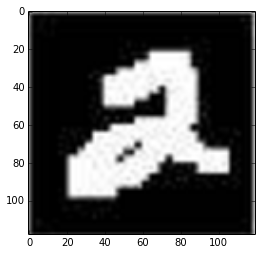

In [14]:
plt.imshow(img)
# copy the image data into the memory allocated for the net
net.blobs['data'].data[...] = gray

### perform classification
output = net.forward()

output_prob = output['prob'][0]  # the output probability vector for the first image in the batch

print 'predicted class is:', output_prob.argmax()
